# Яндекс.Афиша. Снижение расходов

# Описание проекта  
  
Предоставлены данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:  
  
•	лог сервера с данными о посещениях сайта Яндекс.Афиши,  
•	выгрузка всех заказов за этот период,  
•	статистика рекламных расходов.  
  
**Цель проекта:** Определить невыгодные источники трафика и решить, как перераспределить бюджет.

**Задачи:**  
•	Выяснить, как клиенты пользуются сервисом  
•	Определить, когда делают первые покупки на сайте  
•	Рассчитать, сколько денег приносит компании каждый клиент  
•	Выявить, когда расходы на привлечение клиента окупаются  
  
**Этапы анализа:**  
  
1. Загрузка данных и подготовка их к анализу  
  
1.1. Перевод данных о визитах, заказах и рекламных расходах в переменные;  
1.2. Подготовка данных.  
  
2. Расчет метрик и построение графиков  
  
2.1. Продуктовые метрики  
2.1.1. Расчет DAU, WAU и MAU. Вычисление средних значений этих метрик за весь период. Отображение изменения метрик во времени на графиках;  
2.1.2. Определение, сколько раз за день пользователи в среднем заходят на сайт. Построение графика, отражающего изменения метрики во времени;  
2.1.3. Исследование, сколько времени пользователи проводят на сайте. Определение продолжительности типичной пользовательской сессии за весь период;  
2.1.4. Рассчет Retention Rate с применением когортного анализа. Отображение изменения метрики во времени на графике. Расчет среднего Retention Rate на второй месяц «жизни» когорт.  
  
2.2. Метрики электронной коммерции  
2.2.1. Исследование, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки;  
2.2.2. Расчет среднего количества покупок на одного покупателя за определённый период, например за 6 месяцев;  
2.2.3. Расчет среднего чека с применнением группировки по времени совершения покупки;  
2.2.4. Вычисление, как меняется LTV на покупателя по когортам. Отражение изменения метрики во времени на графике;  
  
2.3. Маркетинговые метрики  
2.3.1. Подсчет общей суммы расходов на маркетинг. Изучение распределения трат по источникам. Визуализация изменения метрик во времени;  
2.3.2. Расчет среднего CAC на одного покупателя для всего проекта и для каждого источника трафика. Отражение изменения метрик на графиках;  
2.3.3. Рассчет ROMI по когортам в разрезе источников. Сравнение окупаемости за одинаковые периоды жизни когорт. Построение графиков, отражающих изменения метрик во времени.  
  
3. Формулировка выводов и рекомендаций  


## Загрузка данных и подготовка их к анализу


### Перевод данных о визитах, заказах и рекламных расходах в переменные

In [1]:
# загрузим библиотеки, переведем данные о визитах, заказах и рекламных расходах в переменные, выведем данные на экран и изучим их
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import random
import numpy as np
import seaborn as sns
from scipy import stats as st
from plotly import graph_objects as go
import plotly.express as px

visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

display(visits.head())
visits.describe()

Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

Source Id           Uid
count  359400.000000  3.594000e+05
mean        3.750515  9.202557e+18
std         1.917116  5.298433e+18
min         1.000000  1.186350e+13
25%         3.000000  4.613407e+18
50%         4.000000  9.227413e+18
75%         5.000000  1.372824e+19
max        10.000000  1.844668e+19

In [2]:
display(orders.head())
orders.describe()

Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19

In [3]:
display(costs.head())
costs.describe()

source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000

**Описание данных**  
  
В нашем распоряжении три датасета.  
Файл visits_log.csv хранит лог сервера с информацией о посещениях сайта, orders_log.csv — информацию о заказах, а costs.csv — информацию о расходах на маркетинг.  
  
Структура visits_log.csv  
•	Uid — уникальный идентификатор пользователя,  
•	Device — категория устройства пользователя,  
•	Start Ts — дата и время начала сессии,  
•	End Ts — дата и время окончания сессии,  
•	Source Id — идентификатор источника перехода на сайт.  
  
Структура orders_log.csv  
•	Uid — уникальный идентификатор пользователя,  
•	Buy Ts — дата и время заказа,  
•	Revenue — сумма заказа.  
  
Структура costs.csv  
•	source_id — идентификатор рекламного источника,  
•	dt — дата проведения рекламной кампании,  
•	costs — расходы на эту кампанию.  


### Подготовим данные

In [4]:
# переименуем колонки
visits = visits.rename(columns={'End Ts': 'session_end', 'Start Ts': 'session_start'})

# приведем названия колонок к нижнему регистру
visits.columns = visits.columns.str.lower()
display(visits.head())

device          session_end  source id        session_start  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

In [5]:
# переименуем колонку
orders = orders.rename(columns={'Buy Ts': 'date_of_purchase'})

# приведем названия колонок к нижнему регистру
orders.columns = orders.columns.str.lower()
display(orders.head())

date_of_purchase  revenue                   uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

In [6]:
# переименуем колонку
costs = costs.rename(columns={'dt': 'date'})

# приведем названия колонок к нижнему регистру
costs.columns = costs.columns.str.lower()
display(costs.head())

source_id        date  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

In [7]:
# колонки с типом данных object, в которых хранятся даты, изменим на временной формат
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['date_of_purchase'] = pd.to_datetime(orders['date_of_purchase'])

costs['date'] = pd.to_datetime(costs['date'])

**Выводы:**  
В таблице visits переименовали колонку 'End Ts' в 'session_end', а колонку 'Start Ts' в 'session_start'.  
В таблице orders переименовали колонку 'Buy Ts' в 'date_of_purchase'.  
В таблице costs переименовали колонку 'dt' в 'date'.  
Привели названия колонок к нижнему регистру.  
Колонки с типом данных object, в которых хранятся даты, изменили на временной формат.  


In [8]:
# приведем колонку device к типу category
visits['device'] = visits['device'].astype('category')

# посчитаем количество устройств по типам
print(visits['device'].value_counts())

desktop    262567
touch       96833
Name: device, dtype: int64


In [9]:
# посчитаем количество дубликатов
print('Количество дубликатов в таблице visits:', visits.duplicated().sum())
print('Количество дубликатов в таблице orders:', orders.duplicated().sum())
print('Количество дубликатов в таблице costs:', costs.duplicated().sum())

Количество дубликатов в таблице visits: 0
Количество дубликатов в таблице orders: 0
Количество дубликатов в таблице costs: 0


## Расчет метрик и построение графиков 

### Продуктовые метрики  

#### Расчет DAU, WAU и MAU

In [10]:
# рассчитаем DAU, WAU и MAU
visits['duration'] = (visits['session_end'] - visits['session_start']).dt.seconds
visits['session_start_day'] = visits['session_start'].dt.date
visits['session_start_week'] = pd.DatetimeIndex(visits['session_start']).week
visits['session_start_month'] = pd.DatetimeIndex(visits['session_start']).month
visits['session_start_year'] = pd.DatetimeIndex(visits['session_start']).year

visits['session_start_day'] = visits['session_start_day'].astype('datetime64[D]')
visits['session_start_week'] = visits['session_start_week'].astype('datetime64[W]')
visits['session_start_month'] = visits['session_start_month'].astype('datetime64[M]')

dau = visits.groupby(['session_start_day']).agg({'uid':'nunique'})
wau = visits.groupby(['session_start_year', 'session_start_week']).agg({'uid':'nunique'})
mau = visits.groupby(['session_start_year', 'session_start_month']).agg({'uid':'nunique'})

print('В день сервисом в среднем пользуются {} человек.'.format(int(dau.mean())))
print('В неделю сервисом в среднем пользуются {} человек.'.format(int(wau.mean())))
print('В месяц сервисом в среднем пользуются {} человек.'.format(int(mau.mean())))

sticky_wau = dau.mean() / wau.mean()
sticky_mau = dau.mean() / mau.mean()

print('Вовлеченность аудитории в течение недели: {:.1%}'.format(sticky_wau[0]))
print('Вовлеченность аудитории в течение месяца: {:.1%}'.format(sticky_mau[0]))

В день сервисом в среднем пользуются 907 человек.
В неделю сервисом в среднем пользуются 5716 человек.
В месяц сервисом в среднем пользуются 23228 человек.
Вовлеченность аудитории в течение недели: 15.9%
Вовлеченность аудитории в течение месяца: 3.9%


In [11]:
# построим график DAU
fig_dau = px.line(visits.groupby('session_start_day')['uid'].nunique().reset_index(), x='session_start_day', y='uid', title='DAU')
fig_dau.show()

In [12]:
# построим график WAU
fig_wau = px.line(visits.groupby('session_start_week')['uid'].nunique().reset_index(), x='session_start_week', y='uid', title='WAU')
fig_wau.show()

In [13]:
# построим график MAU
fig_mau = px.line(visits.groupby('session_start_month')['uid'].nunique().reset_index(), x='session_start_month', y='uid', title='MAU')    
fig_mau.show()

#### Cколько раз за день пользователи в среднем заходят на сайт

In [14]:
# Посчитаем, сколько раз в день в среднем пользователи заходят на сайт
sessions_per_day = visits.groupby('session_start_day')['session_start_day'].count()
print('Пользователи совершают в среднем {} сессий в день'.format(int(sessions_per_day.mean())))

Пользователи совершают в среднем 987 сессий в день


In [15]:
sessions_per_user = visits.groupby(['session_start_year', 'session_start_day']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user['sessions_per_user'].mean()

1.082169644003972

В среднем пользователи заходят на сайт 1 раз в день.

#### Сколько времени пользователи проводят на сайте

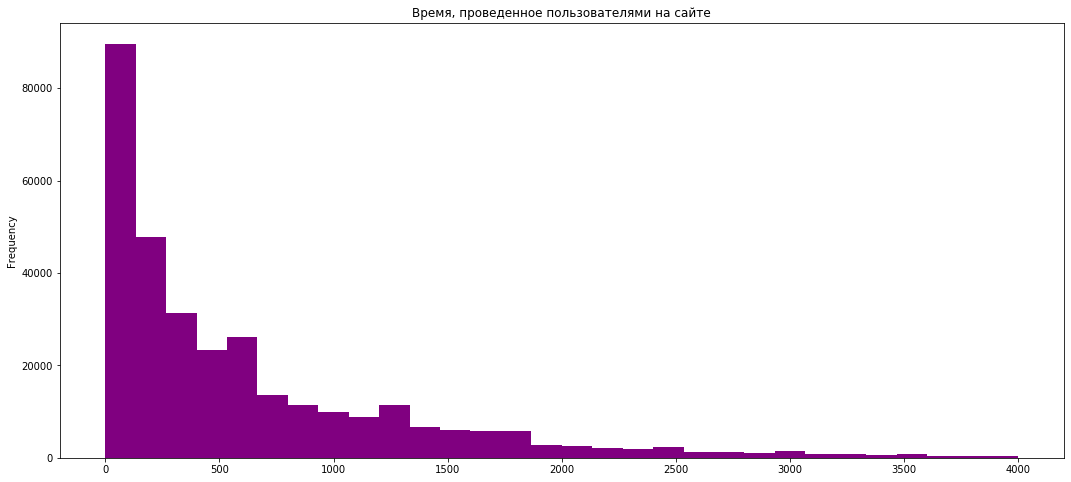

In [16]:
# построим график, сколько времени пользователи проводят на сайте
visits['duration'] = (visits['session_end'] - visits['session_start']).dt.seconds
visits_duration = visits[visits['duration'] != 0]['duration']
visits_duration.plot(kind = 'hist', bins = 30, figsize = (18, 8), color="purple", range = (0, 4000), title='Время, проведенное пользователями на сайте')
plt.show()

In [17]:
# посчитаем, сколько времени пользователи проводят на сайте
# так как распределение далеко от равномерного, рассчитаем моду
mean_session = visits[visits['duration'] != '0 seconds']['duration'].mode()
print(visits_duration.describe())
print('Одна сессия длится в среднем {} секунд'.format(mean_session[0]))

count    323606.000000
mean        714.684623
std        1047.052806
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       84480.000000
Name: duration, dtype: float64
Одна сессия длится в среднем 60 секунд


/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



#### Рассчет Retention Rate с применением когортного анализа

In [18]:
sessions_per_user = visits.groupby(['session_start_year', 'session_start_day']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
print('Cреднее число сессий на уникального пользователя:', sessions_per_user['sessions_per_user'].mean())

Cреднее число сессий на уникального пользователя: 1.082169644003972


In [19]:
# сформируем когорты на основе даты первой сессии
first_session = visits.groupby('uid')['session_start'].min()
first_session.name = 'first_session_date'
display(first_session.head())

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: first_session_date, dtype: datetime64[ns]

In [20]:
# объединим таблицу с когортами с таблицей visits
visits = visits.join(first_session, on='uid', lsuffix='_left')

In [21]:
# сформируем таблицу с первыми месяцами события
visits['session_month'] = visits['session_start_day'].astype('datetime64[M]')
visits['first_session_month'] = visits['first_session_date'].astype('datetime64[M]')

display(visits.head())

device         session_end  source id       session_start  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  duration session_start_day session_start_week  \
0  16879256277535980062      1080        2017-12-20         1970-12-24   
1    104060357244891740      1680        2018-02-19         1970-02-26   
2   7459035603376831527         0        2017-07-01         1970-07-02   
3  16174680259334210214      1440        2018-05-20         1970-05-21   
4   9969694820036681168         0        2017-12-27         1970-12-31   

  session_start_month  session_start_year  first_session_date session_month  \
0          1971-01-01                2017 2017-12-20 17:20:00    2017-12-01   
1          1970-03-01                2018 2018-02-19 16:53:00    2018-02-01   
2          1970-08-01                2017 2017-07-01 01:54:00    2017-07-01   
3          1970-06-01                2018 2018-03-09 20:05:00    2018-05-01   
4          1971-01-01                2017 2017-12-27 14:06:00    2017-12-01   

  first_session_month  
0          2017-12-01  
1          2018-02-01  
2          2017-07-01  
3          2018-03-01  
4          2017-12-01

In [22]:
# посчитаем lifetime для всех пользователей
visits['cohort_lifetime'] = visits['session_month'] - visits['first_session_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(int)

display(visits.head())

device         session_end  source id       session_start  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  duration session_start_day session_start_week  \
0  16879256277535980062      1080        2017-12-20         1970-12-24   
1    104060357244891740      1680        2018-02-19         1970-02-26   
2   7459035603376831527         0        2017-07-01         1970-07-02   
3  16174680259334210214      1440        2018-05-20         1970-05-21   
4   9969694820036681168         0        2017-12-27         1970-12-31   

  session_start_month  session_start_year  first_session_date session_month  \
0          1971-01-01                2017 2017-12-20 17:20:00    2017-12-01   
1          1970-03-01                2018 2018-02-19 16:53:00    2018-02-01   
2          1970-08-01                2017 2017-07-01 01:54:00    2017-07-01   
3          1970-06-01                2018 2018-03-09 20:05:00    2018-05-01   
4          1971-01-01                2017 2017-12-27 14:06:00    2017-12-01   

  first_session_month  cohort_lifetime  
0          2017-12-01                0  
1          2018-02-01                0  
2          2017-07-01                0  
3          2018-03-01                2  
4          2017-12-01                0

In [23]:
# сгруппируем данные по когорте и lifetime, посчитаем количество активных пользователей за месяц
session_cohorts = visits.groupby(['first_session_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

# проверим количество визитов
visits_pivot = visits.pivot_table(index='first_session_month',columns='cohort_lifetime',values='uid',aggfunc='nunique')
display(visits_pivot.fillna(''))

# найдем исходное количество пользователей в когорте, возьмем их число на нулевой месяц
inital_users_count = session_cohorts[session_cohorts['cohort_lifetime'] == 0][['first_session_month','uid']]
inital_users_count = inital_users_count.rename(columns={'uid':'cohort_users'})
session_cohorts = session_cohorts.merge(inital_users_count, on='first_session_month')

# разделим число пользователей в каждый следующий месяц на исходное число пользователей, получим Retention Rate   
session_cohorts['retention'] = session_cohorts['uid']/session_cohorts['cohort_users']
retention_pivot = session_cohorts.pivot_table(index='first_session_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

cohort_lifetime           0     1     2     3    4    5    6    7    8    9   \
first_session_month                                                            
2017-06-01           13259.0  1043   713   814  909  947  809  766  694  674   
2017-07-01           13140.0   737   674   738  765  633  596  601  510  376   
2017-08-01           10181.0   783   640   639  510  448  370  402  284  265   
2017-09-01           16704.0  1428  1156   847  658  632  599  404  381        
2017-10-01           25977.0  2042  1357  1012  890  837  555  529             
2017-11-01           27248.0  2133  1202  1054  919  638  594                  
2017-12-01           25268.0  1410   960   786  512  481                       
2018-01-01           22624.0  1351   890   565  458                            
2018-02-01           22197.0  1267   565   446                                 
2018-03-01           20589.0   861   557                                       
2018-04-01           15709.0   760                                             
2018-05-01           15273.0                                                   

cohort_lifetime       10   11  
first_session_month            
2017-06-01           539  596  
2017-07-01           361       
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01

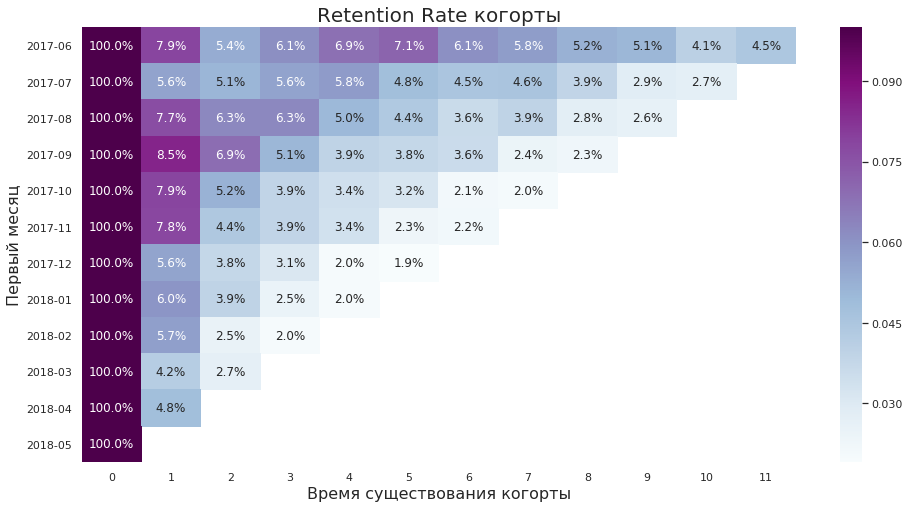

In [24]:
# построим тепловую карту Retention Rate 
sns.set(style='white')
plt.figure(figsize=(16, 8))
plt.title('Retention Rate когорты', fontsize=20)
sns.heatmap(retention_pivot, cmap="BuPu", annot=True, fmt='.1%',  vmax=0.1, linecolor='black', yticklabels=retention_pivot.index.strftime('%Y-%m'))
plt.ylabel('Первый месяц', fontsize=16)
plt.xlabel('Время существования когорты', fontsize=16)
plt.show()

In [25]:
print('Значение RR когорты 2-го месяца: {:.2%}'.format(retention_pivot[1].mean()))

Значение RR когорты 2-го месяца: 6.52%


**Вывод**  
Наибольший Retention второго месяца видим в сентябре - 8.5%.  
С сентябрьской когорты Retention Rate постепенно убывает по когортам с течением времени.  
Наименьший Retention отслеживается в марте - 4.2%, что в 2 раза меньше, чем в сентябре.  
Похоже, что с каждым месяцем сервис становится менее привлекательным для пользователей.  

# Выводы:  
В день сервисом в среднем пользуются 907 человек.  
В неделю сервисом в среднем пользуются 5716 человек.  
В месяц сервисом в среднем пользуются 23228 человек.  
Вовлеченность аудитории в течение недели: 15.9%  
Вовлеченность аудитории в течение месяца: 3.9%  
Можно сделать вывод, что вовлеченноcть аудитории невысокая.  
  
Cреднее число сессий на уникального пользователя: 1.08. Это подтверждает тот факт, что сервисом пользуются редко.   
Одна сессия длится в среднем 1 минуту - это мало.   
  
Наибольший Retention второго месяца видим в сентябре - 8.5%.  
С сентябрьской когорты Retention Rate постепенно убывает по когортам с течением времени.  
Наименьший Retention отслеживается в марте - 4.2%, что в 2 раза меньше, чем в сентябре.  
Похоже, что с каждым месяцем сервис становится менее привлекательным для пользователей.  
  


### Метрики электронной коммерции  

#### Cколько времени в среднем проходит с момента первого посещения сайта до совершения покупки 

In [26]:
# найдем дату и время первой сессии для каждого пользовтеля
first_session = visits.groupby('uid')['session_start'].min()
first_session.name = 'first_session_date'
display(first_session.head())

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: first_session_date, dtype: datetime64[ns]

In [27]:
# добавим информацию о первых визитах пользователей в таблицу с заказами
orders = orders.merge(first_session, on='uid')
display(orders.head())

date_of_purchase  revenue                   uid  first_session_date
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:09:00
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:14:00
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:25:00
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:14:00
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:31:00

In [28]:
# посчитаем сколько секунд прошло от момента первой сессии пользователя до покупки
orders['start_to_buy_sec'] = (orders['date_of_purchase'] - orders['first_session_date']).dt.seconds
display(orders.head())

date_of_purchase  revenue                   uid  first_session_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:09:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:14:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:25:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:14:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:31:00   

   start_to_buy_sec  
0                60  
1               660  
2               120  
3               900  
4              1620

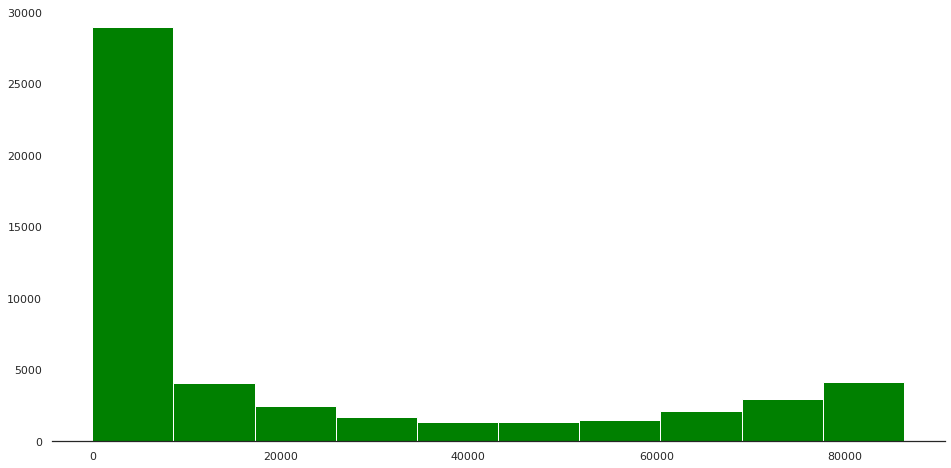

In [29]:
# построим график распределения времени от момента первой сессии пользователя до покупки
plt.figure(figsize=(16, 8))
orders['start_to_buy_sec'].hist(bins=10, grid=False, color='green')
sns.despine(left=True)
plt.show()

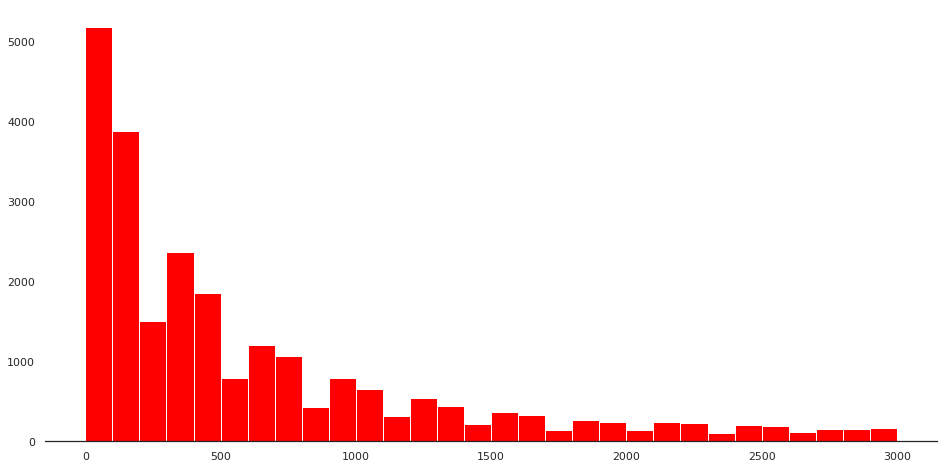

In [30]:
# рассмотрим более подробно распределение до 3000
plt.figure(figsize=(16, 8))
orders['start_to_buy_sec'].hist(bins=30, range=(0, 3000), grid=False, color='red')
sns.despine(left=True)
plt.show()

Большая часть значений распределяется в промежутке от 0 до 500 секунд, то есть большинству пользователей необходимо менее 10 мин, чтобы совершить покупку.
При этом пользователи, которым на принятие решения о покупке необходимо более суток.

#### Расчет среднего количества покупок на одного покупателя за определённый период

In [31]:
# найдем дату первого заказа
first_order_dates = orders.groupby('uid')['date_of_purchase'].min()
first_order_dates.name = 'first_order_datetime'

# соединим с таблицей с заказами
orders = orders.join(first_order_dates, on='uid', how='left', lsuffix='_left')

# выделим месяц заказа и первый месяц и добавим в таблицу
orders['order_month'] = orders['date_of_purchase'].astype('datetime64[M]')
orders['first_order_month'] = orders['first_order_datetime'].astype('datetime64[M]')
#print(orders.head(10))

# посчитаем суммарную выручку по когортам
cohort_stats = orders.groupby('first_order_month')['revenue'].sum()


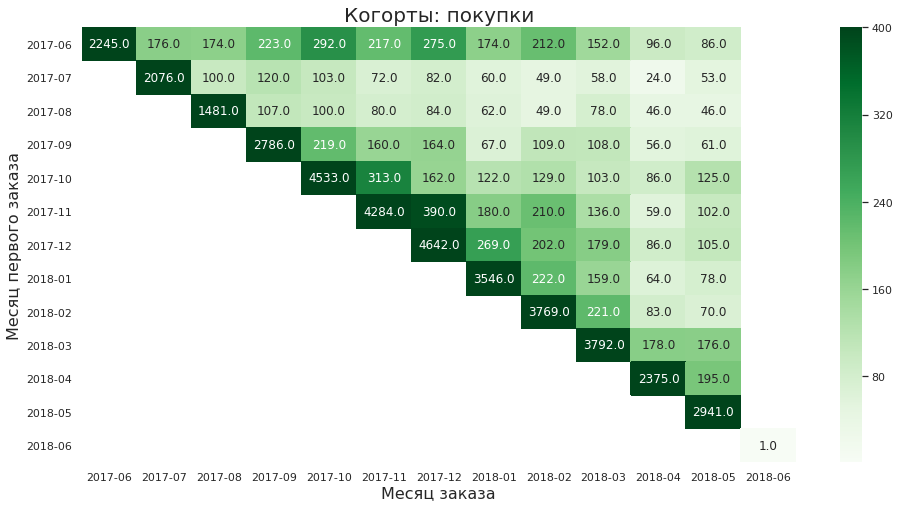

In [32]:
# построим таблицу когорт по покупкам
purchases = orders.pivot_table(index='first_order_month',
    columns='order_month',
    values='date_of_purchase',
    aggfunc='nunique')

# построим тепловую карту
sns.set(style='white')
plt.figure(figsize=(16, 8))
plt.title('Когорты: покупки', fontsize=20)
sns.heatmap(purchases, cmap="Greens", annot=True, fmt='.5', vmax= 400, linecolor='black', yticklabels=purchases.index.strftime('%Y-%m'), xticklabels=purchases.index.strftime('%Y-%m'))
plt.xlabel('Месяц заказа', fontsize=16)
plt.ylabel('Месяц первого заказа', fontsize=16)
plt.show()

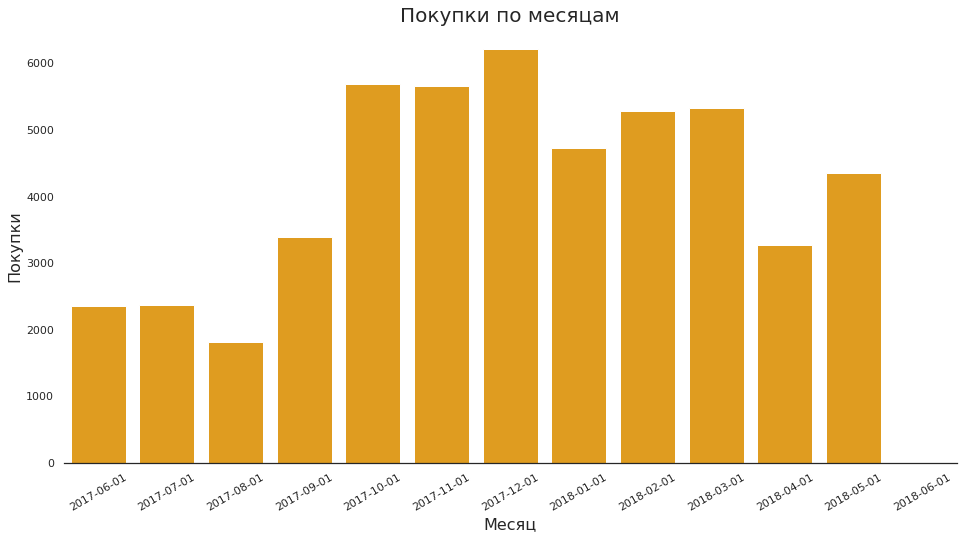

In [33]:
# посчитаем, сколько покупок было совершено в каждый месяц
a=orders.groupby('order_month')['date_of_purchase'].count().reset_index()
a['order_month']=a['order_month'].astype('str')

plt.figure(figsize=(16, 8))
plt.title('Покупки по месяцам', fontsize=20)
sns.barplot(x='order_month', y='date_of_purchase', data=a, color="orange", label="line")
sns.despine(left=True)
plt.xlabel('Месяц', fontsize=16)
plt.ylabel('Покупки', fontsize=16)
plt.xticks(rotation=30)
plt.show()

#### Расчет среднего чека с применнением группировки по времени совершения покупки

In [34]:
# сгруппируем покупки по времени
first_orders = orders.groupby('uid').agg({'date_of_purchase': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_session']

first_visits = visits.groupby('uid').agg({'session_start': 'min'}).reset_index()
first_visits.columns = ['uid', 'first_visit_session']

buyers = pd.merge(first_visits, first_orders, on='uid')
buyers['first_order_month'] = buyers['first_order_session'].astype('datetime64[M]')

cohort_sizes = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)

cohorts = pd.merge(orders, buyers, how='inner', on=['uid', 'first_order_month'])\
    .groupby(['first_order_month', 'order_month'])\
    .agg({'revenue': ['sum', 'count']}).reset_index()
    
# посчитаем возраст каждой когорты

cohorts['age_month'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1,'M')).round()
cohorts.columns = ['first_order_month', 'order_month', 'revenue', 'n_orders', 'age_month']
    
# добавим в когортный отчет количество покупателей в каждой когорте и посчитаем выручку и количество заказов на каждого покупателя.

cohorts_report = pd.merge(cohort_sizes, cohorts, on = 'first_order_month')
cohorts_report['rev_per_buyer'] = cohorts_report['revenue'] / cohorts_report['n_buyers']
cohorts_report['orders_per_buyer'] = cohorts_report['n_orders'] / cohorts_report['n_buyers']

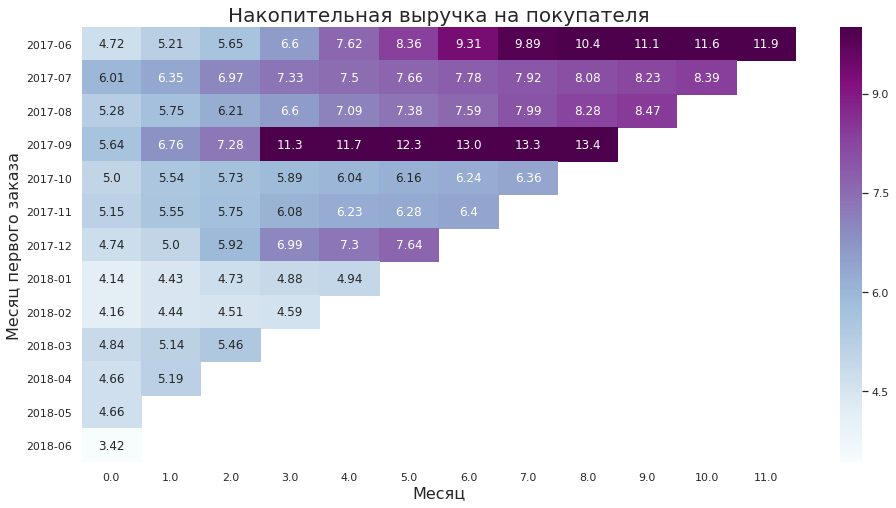

In [35]:
# сделаем возростной когортный отчет, показывающий накопительную выручку на покупателя
cohorts_age = cohorts_report.pivot_table(
index='first_order_month', 
columns='age_month', 
values='rev_per_buyer', 
aggfunc='sum'
).cumsum(axis=1)

# построим тепловую карту
sns.set(style='white')
plt.figure(figsize=(16, 8))
plt.title('Накопительная выручка на покупателя', fontsize=20)
sns.heatmap(cohorts_age, cmap="BuPu", annot=True, fmt='.3', vmax= 10, linecolor='black', yticklabels=cohorts_age.index.strftime('%Y-%m'),)
plt.xlabel('Месяц', fontsize=16)
plt.ylabel('Месяц первого заказа', fontsize=16)
plt.show()

In [36]:
# сделаем возростной когортный отчет, показывающий накопительное количество заказов и выручку на покупателя

cohorts_age = cohorts_report.pivot_table(
index='first_order_month', 
columns='age_month', 
values=['rev_per_buyer', 'orders_per_buyer'], 
aggfunc='sum'
).cumsum(axis=1)

display(cohorts_age.fillna(''))

orders_per_buyer                                      \
age_month                     0.0      1.0      2.0      3.0      4.0    
first_order_month                                                        
2017-06-01                1.163618  1.25111  1.33712  1.44884  1.59318   
2017-07-01                1.136765  1.18877  1.25117  1.30525  1.34269   
2017-08-01                1.118978  1.19781   1.2708  1.32993  1.39197   
2017-09-01                1.136381  1.22123  1.28361  1.34715  1.37311   
2017-10-01                1.143779  1.21613  1.25346  1.28157  1.31129   
2017-11-01                1.179368  1.27665  1.32124  1.37295  1.40627   
2017-12-01                1.152635  1.21424  1.26032  1.30116  1.32078   
2018-01-01                1.121554  1.18796   1.2351  1.25408   1.2772   
2018-02-01                1.121611  1.18242  1.20515  1.22432            
2018-03-01                1.168978  1.21936  1.26918                     
2018-04-01                1.096221   1.1819                              
2018-05-01                1.087349                                       
2018-06-01                1.000000                                       

                                                                ...  \
age_month             5.0      6.0      7.0      8.0      9.0   ...   
first_order_month                                               ...   
2017-06-01         1.70094  1.83737  1.92338  2.02818  2.10381  ...   
2017-07-01         1.38534  1.41706  1.44306  1.47322   1.4857  ...   
2017-08-01         1.43723  1.47299  1.52993   1.5635  1.59708  ...   
2017-09-01         1.41534  1.45719  1.47888  1.50252           ...   
2017-10-01         1.33502  1.35484  1.38364                    ...   
2017-11-01         1.42073  1.44572                             ...   
2017-12-01         1.34474                                      ...   
2018-01-01                                                      ...   
2018-02-01                                                      ...   
2018-03-01                                                      ...   
2018-04-01                                                      ...   
2018-05-01                                                      ...   
2018-06-01                                                      ...   

                  rev_per_buyer                                               \
age_month                  2.0      3.0      4.0      5.0      6.0      7.0    
first_order_month                                                              
2017-06-01              7.84115  8.79582  9.81835  10.5539  11.5043  12.0859   
2017-07-01              8.48222   8.8412  9.01799  9.17404  9.29424  9.43606   
2017-08-01              7.80407  8.19535   8.6894  8.97294  9.18361  9.58861   
2017-09-01              8.78556  12.7614  13.1619   13.809  14.5106  14.7537   
2017-10-01              7.11453  7.27168  7.42324   7.5436  7.62841  7.74388   
2017-11-01               7.1992  7.52415  7.67216  7.72604  7.84097            
2017-12-01               7.2684  8.33368  8.64661  8.98465                     
2018-01-01              6.01188  6.15465  6.21735                              
2018-02-01               5.7381  5.81224                                       
2018-03-01              6.72443                                                
2018-04-01                                                                     
2018-05-01                                                                     
2018-06-01                                                                     

                                                      
age_month             8.0      9.0      10.0    11.0  
first_order_month                                     
2017-06-01         12.6391  13.2449  13.8161  14.073  
2017-07-01          9.5973  9.74444  9.90011          
2017-08-01         9.88082  10.0688                   
2017-09-01         14.9377                            
2017-10-01                    

In [37]:
print('В среднем за 6 месяцев после первой покупки каждый покупатель делает {:.2f} заказа и приносит ${:.2f} выручки.'\
  .format(cohorts_age['orders_per_buyer'][5].mean(), cohorts_age['rev_per_buyer'][5].mean()))

В среднем за 6 месяцев после первой покупки каждый покупатель делает 1.43 заказа и приносит $9.54 выручки.


In [38]:
display(orders.head())
print(orders.describe())

date_of_purchase  revenue                   uid  first_session_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:09:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:14:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:25:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:14:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:31:00   

   start_to_buy_sec first_order_datetime order_month first_order_month  
0                60  2017-06-01 00:10:00  2017-06-01        2017-06-01  
1               660  2017-06-01 00:25:00  2017-06-01        2017-06-01  
2               120  2017-06-01 00:27:00  2017-06-01        2017-06-01  
3               900  2017-06-01 00:29:00  2017-06-01        2017-06-01  
4              1620  2017-06-01 07:58:00  2017-06-01        2017-06-01

            revenue           uid  start_to_buy_sec
count  50415.000000  5.041500e+04      50415.000000
mean       4.999647  9.098161e+18      21482.556382
std       21.818359  5.285742e+18      29056.969172
min        0.000000  3.135781e+14          0.000000
25%        1.220000  4.533567e+18        360.000000
50%        2.500000  9.102274e+18       3840.000000
75%        4.890000  1.368290e+19      39000.000000
max     2633.280000  1.844617e+19      86340.000000


In [39]:
print('Средний чек равен {:.2f} у.е.'.format(orders['revenue'].mean()))

Средний чек равен 5.00 у.е.


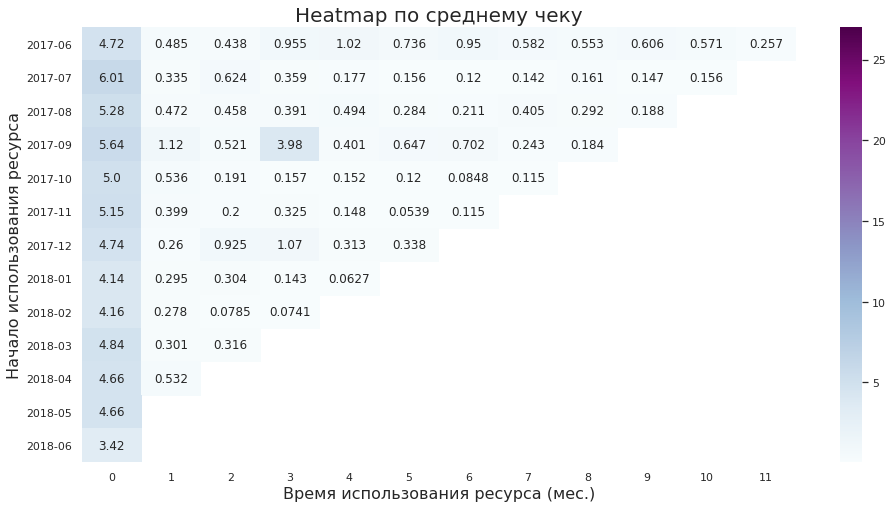

In [40]:
mean_check = cohorts.merge(cohort_sizes, on='first_order_month')
time_diff = mean_check['order_month'] - mean_check['first_order_month']
mean_check['age'] = time_diff / np.timedelta64(1, 'M')
mean_check['age'] = mean_check['age'].round().astype('int')
mean_check['mean_check'] = mean_check['revenue']/mean_check['n_buyers']
mean_check_pivot = mean_check.pivot_table(index="first_order_month", columns="age", values="mean_check")

# построим тепловую карту по среднему чеку
sns.set(style='white')
plt.figure(figsize=(16, 8))
plt.title('Heatmap по среднему чеку', fontsize=20)
sns.heatmap(mean_check_pivot, cmap="BuPu", annot=True, fmt='.3', vmax= 27, linecolor='black', yticklabels=cohorts_age.index.strftime('%Y-%m'),)
plt.xlabel('Время использования ресурса (мес.)', fontsize=16)
plt.ylabel('Начало использования ресурса', fontsize=16)
plt.show()

#### Вычисление, как меняется LTV на покупателя по когортам

Необходимо вычислить сумму денег, которую один клиент приносит в среднем со всех своих покупок. 

In [41]:
# сформируем когорты по месяцам, выделим месяцы из дат в таблицах с заказами и расходами
costs['month'] = costs['date'].astype('datetime64[M]')

# найдем первый месяц покупки каждого покупателя
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
display(first_orders.head())

uid first_order_month
0   313578113262317        2018-01-01
1  1575281904278712        2017-06-01
2  2429014661409475        2017-10-01
3  2464366381792757        2018-01-01
4  2551852515556206        2017-11-01

In [42]:
# cгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку
cohorts_new = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
display(cohorts_new.head())

first_order_month order_month  revenue
0        2017-06-01  2017-06-01  9557.49
1        2017-06-01  2017-07-01   981.82
2        2017-06-01  2017-08-01   885.34
3        2017-06-01  2017-09-01  1931.30
4        2017-06-01  2017-10-01  2068.58

In [43]:
# добавим данные о том, сколько людей первый раз совершили покупку в каждый месяц
report = pd.merge(cohort_sizes, cohorts_new, on='first_order_month')
display(report.head())

first_order_month  n_buyers order_month  revenue
0        2017-06-01      2023  2017-06-01  9557.49
1        2017-06-01      2023  2017-07-01   981.82
2        2017-06-01      2023  2017-08-01   885.34
3        2017-06-01      2023  2017-09-01  1931.30
4        2017-06-01      2023  2017-10-01  2068.58

In [44]:
# зададим маржинальность
margin_rate = 0.5

# посчитаем валовую прибыль
report['gp'] = report['revenue'] * margin_rate

# посчитаем возраст когорт
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

display(report.head())

first_order_month  n_buyers order_month  revenue        gp  age
0        2017-06-01      2023  2017-06-01  9557.49  4778.745    0
1        2017-06-01      2023  2017-07-01   981.82   490.910    1
2        2017-06-01      2023  2017-08-01   885.34   442.670    2
3        2017-06-01      2023  2017-09-01  1931.30   965.650    3
4        2017-06-01      2023  2017-10-01  2068.58  1034.290    4

first_order_month  n_buyers order_month  revenue        gp  age       ltv
0        2017-06-01      2023  2017-06-01  9557.49  4778.745    0  2.362207
1        2017-06-01      2023  2017-07-01   981.82   490.910    1  0.242664
2        2017-06-01      2023  2017-08-01   885.34   442.670    2  0.218819
3        2017-06-01      2023  2017-09-01  1931.30   965.650    3  0.477336
4        2017-06-01      2023  2017-10-01  2068.58  1034.290    4  0.511265

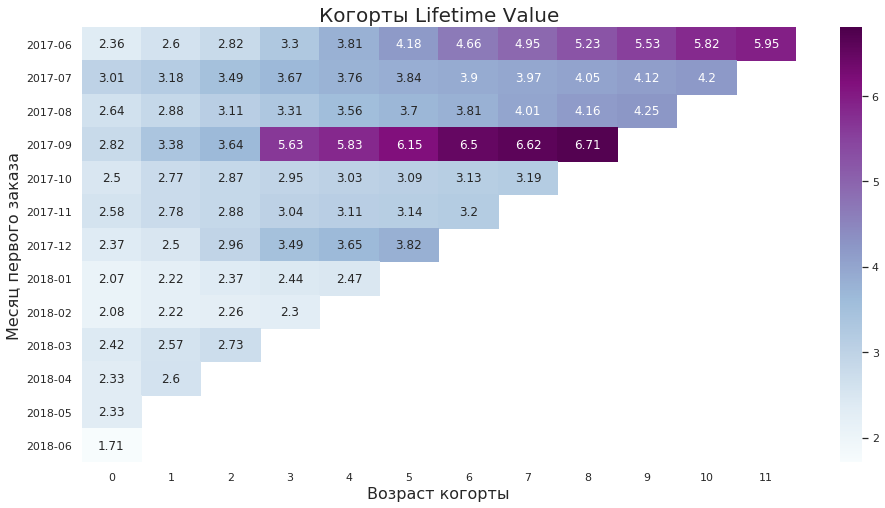

In [46]:
# найдём Lifetime Value, разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте
report['ltv'] = report['gp'] / report['n_buyers']
display(report.head())

output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2).cumsum(axis=1)

output.fillna('')

# построим тепловую карту LTV 
sns.set(style='white')
plt.figure(figsize=(16, 8))
plt.title('Когорты Lifetime Value', fontsize=20)
sns.heatmap(output, cmap="BuPu", annot=True, fmt='.3', vmax= 6.8, linecolor='black', yticklabels=output.index.strftime('%Y-%m'),)
plt.xlabel('Возраст когорты', fontsize=16)
plt.ylabel('Месяц первого заказа', fontsize=16)
plt.show()

# Выводы:  
Большая часть значений распределяется в промежутке от 0 до 500 секунд, то есть большинству пользователей необходимо менее 10 мин, чтобы совершить покупку.  
При этом пользователи, которым на принятие решения о покупке необходимо более суток.  
  
Очевидной зависимости изменения количества покупок со временем в пределах когорты не прослеживается.  
  
Количество покупок растет с сентября по май, а снижается летом.  
Активнее всего покупатели в осенне-зимний период.  
  
В среднем за 6 месяцев после первой покупки каждый покупатель делает 1.43 заказа и приносит 9.54 у.е. выручки.  
В среднем при маржинальности 50 процентов каждый покупатель из первой когорты приносит около 6 у.е. выручки за 12 месяцев существования.   
Сентябрьская когорта превзошла такие показатели на 6 месяце.


### Маркетинговые метрики 

#### Подсчет общей суммы расходов на маркетинг. Изучение распределения трат по источникам

In [47]:
# посчитаем общую сумму затрат на маркетинг
costs_total = costs['costs'].sum()
print('Всего потратили на маркетинг {} у.е.'.format(costs_total))

Всего потратили на маркетинг 329131.62 у.е.


In [48]:
# посчитаем затраты по источникам
costs_per_source = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
costs_per_source.columns = ['source_id', 'cost']

#построим круговую диаграмму затрат по источникам
name = costs_per_source['source_id']
values = costs_per_source['cost']
colors=['darkorange', 'yellowgreen', 'teal', 'lightcoral', 'purple', 'orchid', 'royalblue']

fig = go.Figure(data=[go.Pie(labels=name, values=values)])
fig.update_layout(
    title="Затраты по источникам",
    font=dict(
        size=20
    ))
fig.update_traces(marker=dict(colors=colors))
fig.show()


Всего 10 источников.  
Больше всего затрат по 3-ему источнику - 42,9%.  
По 4-ому источнику затраты составляют 18,6%, по 5-ому - 15,7%, по 2-ому - 13%.  
Меньше всего затрат по 1-ому источнику - 6,33%, и по 9-ому и 10-ому источникам - менее 2% по каждому.

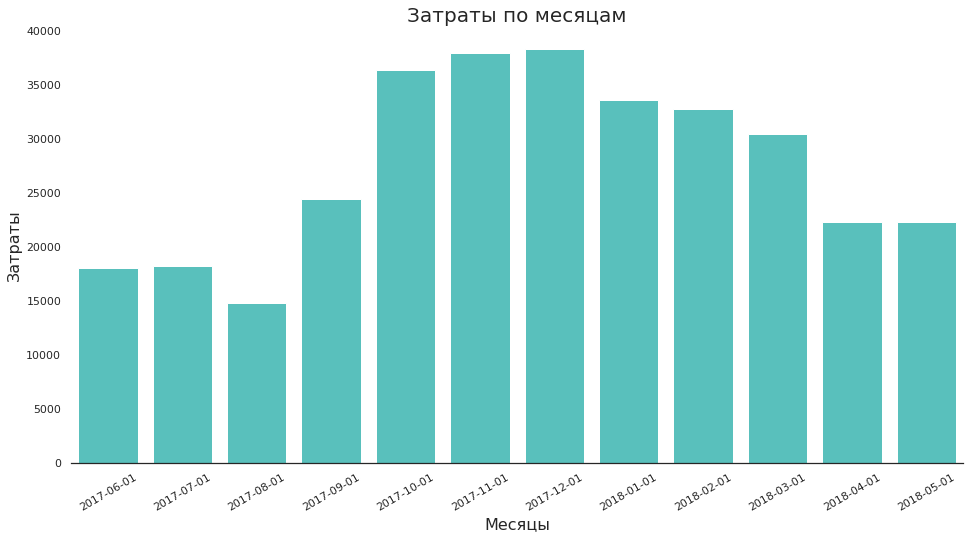

In [49]:
# рассчитаем затраты по месяцам
monthly_costs = costs.groupby('month')['costs'].sum().reset_index()

# построим график затрат по месяцам
monthly_costs['month_x'] = monthly_costs['month'].astype('str')

plt.figure(figsize=(16, 8))
plt.title('Затраты по месяцам', fontsize=20)
sns.barplot(x='month_x', y='costs', data=monthly_costs, color="mediumturquoise", label="line")
sns.despine(left=True)
plt.xlabel('Месяцы', fontsize=16)
plt.ylabel('Затраты', fontsize=16)
plt.xticks(rotation=30)
plt.show()

#### Расчет среднего CAC на одного покупателя для всего проекта и для каждого источника трафика

In [50]:
# получим таблицу с первыми визитами пользователей по источникам
visits_uid = visits[['source id', 'first_session_month', 'uid']]
display(visits_uid.head())

source id first_session_month                   uid
0          4          2017-12-01  16879256277535980062
1          2          2018-02-01    104060357244891740
2          5          2017-07-01   7459035603376831527
3          9          2018-03-01  16174680259334210214
4          3          2017-12-01   9969694820036681168

In [51]:
# соединим таблицу с первыми визитами пользователей по источникам с первыми заказами по uid
visits_orders_uid = pd.merge(visits_uid, first_orders, on='uid', how='left')
visits_orders_uid.head()

# так как нас интересуют только пользователи совершившие заказ, отбросим остальных
visits_orders_uid = visits_orders_uid.dropna()
display(visits_orders_uid.head())


source id first_session_month                   uid first_order_month
3           9          2018-03-01  16174680259334210214        2018-03-01
5           5          2017-09-01  16007536194108375387        2017-09-01
12          4          2017-06-01   8056418121947262981        2017-06-01
15          2          2018-02-01  18188358787673499603        2018-02-01
25          4          2017-09-01   2307401184189569202        2017-09-01

In [52]:
# сгруппируем таблицу по источнику и первому визиту, посчитаем количество уникальных покупателей
visits_by_source = (visits_orders_uid
    .groupby(['source id', 'first_session_month'], as_index=False)
    .agg({'uid': 'nunique', 'first_order_month': 'count'})
)
visits_by_source.columns = ['source id', 'group_month', 'n_buyers', 'n_orders']
display(visits_by_source.head())

source id group_month  n_buyers  n_orders
0          1  2017-06-01       706      4643
1          1  2017-07-01       565      1428
2          1  2017-08-01       368       829
3          1  2017-09-01       650      1228
4          1  2017-10-01       911      1508

In [53]:
# сгруппируем таблицу с затратами по источнику и месяцу
costs_by_source = costs.groupby(['source_id', 'month'], as_index=False)['costs'].sum()
costs_by_source.columns = ['source id', 'group_month', 'costs']

# присоединим сгруппированную таблицу со стоимостями к таблице с визитами и количеством покупателей
costs_visits_by_source = pd.merge(visits_by_source, costs_by_source, on=['source id', 'group_month'], how='outer')
costs_visits_by_source.head()
query_by_source = costs_visits_by_source.query('group_month > "2017-12-01"')
display(query_by_source.head())

source id group_month  n_buyers  n_orders    costs
7           1  2018-01-01       530       848  2186.18
8           1  2018-02-01       533       893  2204.48
9           1  2018-03-01       488       764  1893.09
10          1  2018-04-01       303       528  1327.49
11          1  2018-05-01       351       424  1467.61

source id  n_buyers     costs    cac
0          1      2205   9078.85   4.12
1          2      2161  18258.36   8.45
2          3      4445  60826.42  13.68
3          4      4839  26129.32   5.40
4          5      3254  22143.16   6.80
5          9       574   2314.61   4.03
6         10       703   2419.75   3.44

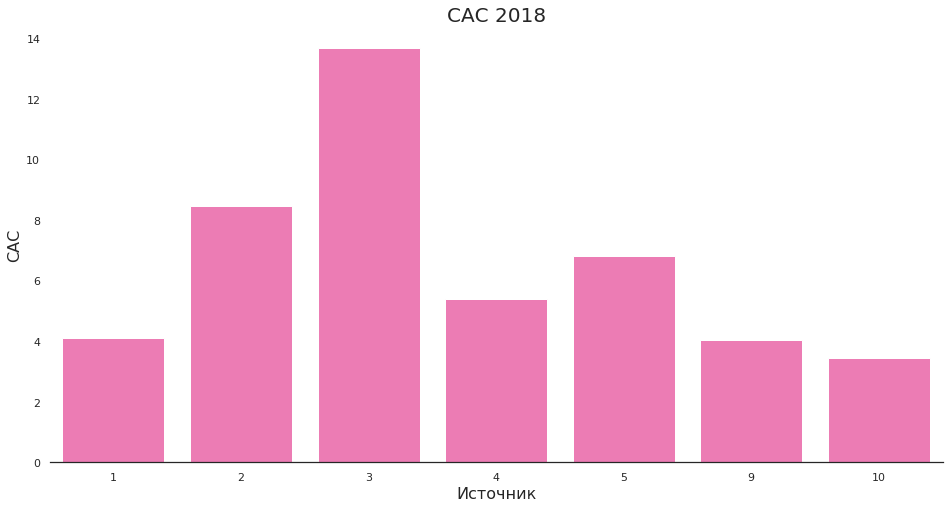

In [54]:
# посчитаем стоимость покупателя за 2018 год
costs_visits_sum = query_by_source.groupby('source id').agg({'n_buyers': 'sum', 'costs': 'sum'}).reset_index()
costs_visits_sum['cac'] = (costs_visits_sum['costs'] / costs_visits_sum['n_buyers']).round(2)
display(costs_visits_sum)

plt.figure(figsize=(16, 8))
plt.title('CAC 2018', fontsize=20)
sns.barplot(x='source id', y='cac', data=costs_visits_sum, color="hotpink", label="line")
sns.despine(left=True)
plt.xlabel('Источник', fontsize=16)
plt.ylabel('САС', fontsize=16)

plt.show()

source id  n_buyers      costs    cac
0          1      7138   20833.27   2.92
1          2      7305   42806.04   5.86
2          3     13846  141321.63  10.21
3          4     14253   61073.60   4.28
4          5     10156   51757.10   5.10
5          7         1       0.00   0.00
6          9      2793    5517.49   1.98
7         10      1773    5822.49   3.28

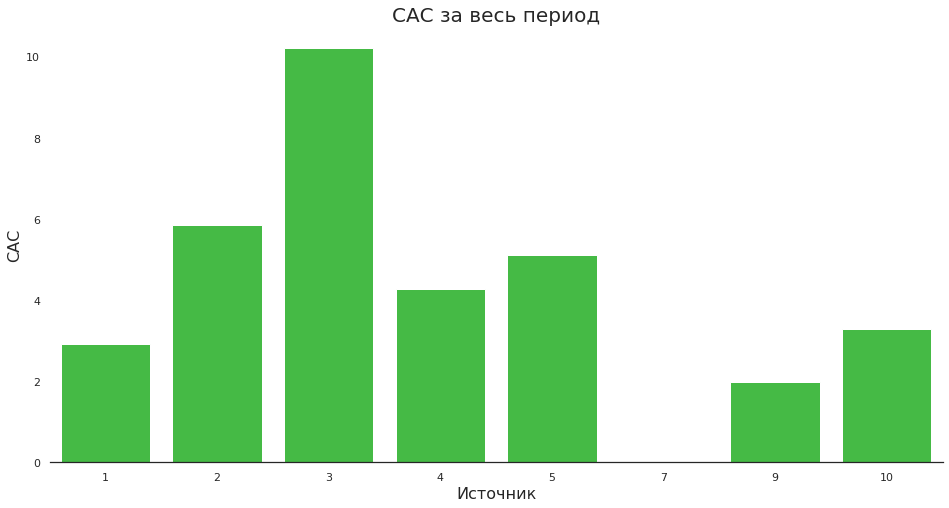

In [55]:
# посчитаем CAC за весь период
costs_visits_sum = costs_visits_by_source.groupby('source id').agg({'n_buyers': 'sum', 'costs': 'sum'}).reset_index()
costs_visits_sum['cac'] = (costs_visits_sum['costs'] / costs_visits_sum['n_buyers']).round(2)
display(costs_visits_sum)

plt.figure(figsize=(16, 8))
plt.title('CAC за весь период', fontsize=20)
sns.barplot(x='source id', y='cac', data=costs_visits_sum, color="limegreen", label="line")
sns.despine(left=True)
plt.xlabel('Источник', fontsize=16)
plt.ylabel('САС', fontsize=16)

plt.show()

По графикам видно, что дороже всего обходится привлечение пользователей через 3-й канал.  
Наиболее выгодным по этому показателю можно считать 4-й канал, от него пришло большее количество покупателей, а затраты на маркетинг были в два раза меньше.  
Также стоит отметить 1-й канал, у него низкая стоимость привлечения покупателей, при сравнительно небольших затратах.  
Цифры сошлись с ожидаемыми: по САС лидирует 3-й источник, за ним идет 2-й.

In [56]:
orders_avg_tab = orders.merge(first_orders,on='uid')
orders_avg_tab['first_session_date'] = orders_avg_tab['first_session_date'].astype('datetime64[M]')
orders_avg_tab['date_of_purchase'] = orders_avg_tab['date_of_purchase'].astype('datetime64[M]')

display(orders_avg_tab.head())

date_of_purchase  revenue                   uid first_session_date  \
0       2017-06-01    17.00  10329302124590727494         2017-06-01   
1       2017-06-01     0.55  11627257723692907447         2017-06-01   
2       2017-06-01     0.37  17903680561304213844         2017-06-01   
3       2017-06-01     0.55  16109239769442553005         2017-06-01   
4       2017-06-01     0.37  14200605875248379450         2017-06-01   

   start_to_buy_sec first_order_datetime order_month first_order_month_x  \
0                60  2017-06-01 00:10:00  2017-06-01          2017-06-01   
1               660  2017-06-01 00:25:00  2017-06-01          2017-06-01   
2               120  2017-06-01 00:27:00  2017-06-01          2017-06-01   
3               900  2017-06-01 00:29:00  2017-06-01          2017-06-01   
4              1620  2017-06-01 07:58:00  2017-06-01          2017-06-01   

  first_order_month_y  
0          2017-06-01  
1          2017-06-01  
2          2017-06-01  
3          2017-06-01  
4          2017-06-01

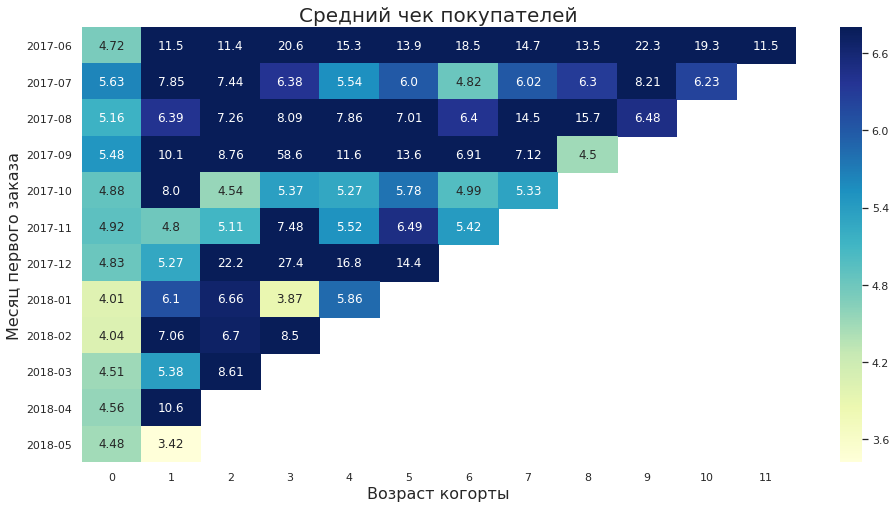

In [57]:
orders_grouped_by_cohorts = orders_avg_tab.groupby(['first_session_date','date_of_purchase']).agg({'revenue':'sum','uid':'nunique'})

orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']

orders_grouped_by_cohorts.pivot_table(index='first_session_date',columns='date_of_purchase',values='revenue_per_user',aggfunc='mean')

orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = (orders_grouped_by_cohorts['date_of_purchase'] - orders_grouped_by_cohorts['first_session_date']) / np.timedelta64(1,'M')
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')
cohorts
orders_grouped_by_cohorts['first_session_date'] = orders_grouped_by_cohorts['first_session_date'].dt.strftime('%Y-%m')

revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(index='first_session_date',columns='cohort_lifetime',values='revenue_per_user',aggfunc='mean')

sns.set(style='white')
plt.figure(figsize=(16, 8))
plt.title('Средний чек покупателей', fontsize=20)
sns.heatmap(revenue_per_user_pivot, cmap="YlGnBu", annot=True, fmt='.3', vmax= 6.8, linecolor='black')
plt.xlabel('Возраст когорты', fontsize=16)
plt.ylabel('Месяц первого заказа', fontsize=16)
plt.show()

Можно сделать вывод, что средний чек покупателей в последующих месяцах всегда выше, чем в первом.  
Других закономерностей не прослеживается.  
В первый месяц клиенты совершают пробную покупку, поэтому чек меньше.  

#### Рассчет ROMI по когортам в разрезе источников. Сравнение окупаемости за одинаковые периоды жизни когорт

Рассчтаем коэффициент возврата маркетинговых инвестиций

In [58]:
# объединим report с затратами на маркетинг по месяцам, добавим столбец со стоимостью привлечения клиента
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
display(report_new.head())

first_order_month  n_buyers order_month  revenue        gp  age       ltv  \
0        2017-06-01      2023  2017-06-01  9557.49  4778.745    0  2.362207   
1        2017-06-01      2023  2017-07-01   981.82   490.910    1  0.242664   
2        2017-06-01      2023  2017-08-01   885.34   442.670    2  0.218819   
3        2017-06-01      2023  2017-09-01  1931.30   965.650    3  0.477336   
4        2017-06-01      2023  2017-10-01  2068.58  1034.290    4  0.511265   

       month    costs     month_x       cac  
0 2017-06-01  18015.0  2017-06-01  8.905091  
1 2017-06-01  18015.0  2017-06-01  8.905091  
2 2017-06-01  18015.0  2017-06-01  8.905091  
3 2017-06-01  18015.0  2017-06-01  8.905091  
4 2017-06-01  18015.0  2017-06-01  8.905091

In [59]:
report_new['romi'] = report_new['ltv'] / report_new['cac']

output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

# построим тепловую карту Romi
output.cumsum(axis=1).round(2).fillna('')

sns.set(style='white')
plt.figure(figsize=(16, 8))
plt.title('Когорты ROMI', fontsize=20)
sns.heatmap(output, cmap="Greens", annot=True, fmt='.1%', vmax= 0.1, linecolor='black', yticklabels=output.index.strftime('%Y-%m'),)
plt.xlabel('Возраст', fontsize=16)
plt.ylabel('Первый месяц заказа', fontsize=16)
plt.show()

Судя по таблице, ни в одной из когорт расходы еще не окупились, но быстрее всего окупаются июньская, сентябрьская и декабрьская когорты.  
Самый большой скачок произошел в сентябрьской когорте между третьим и четвертым месяцем существования.

In [60]:
# посчитаем суммарный ROMI
roi_total = ((report_new['revenue'].sum()) - costs_total)*100 / costs_total
print('Суммарный ROMI:', roi_total.round(), '%')

Суммарный ROMI: -23.0 %


In [61]:
# посчитаем ROMI по источникам
# объединим таблицы, чтобы получить 'source_id', 'revenue', 'costs' в одной, необходимые для рассчета ROMI

orders_roi = orders[['revenue', 'uid']]
visits_roi = visits[['source id', 'uid', 'first_session_date']]

# одному и тому же uid могут соответствовать несколько рекламных источников 
# выявим из какого источника был совершен первый заход, удалим дублирующие значения

visits_roi = visits_roi.groupby(['uid', 'source id'], as_index=False)['first_session_date'].min()
visits_roi = visits_roi.drop_duplicates(subset=['uid','first_session_date'])

roi_table = pd.merge(orders_roi, visits_roi, on='uid')

revenue_by_source = roi_table.groupby('source id', as_index=False).agg({'revenue': 'sum'})

costs_roi = costs.groupby('source_id', as_index=False)['costs'].sum()

costs_roi = costs_roi.rename(columns={'source_id': 'source id'})
roi_total = revenue_by_source.merge(costs_roi, on='source id')
roi_total['roi'] = ((roi_total['revenue'] - roi_total['costs'])*100/ roi_total['costs']).round(2)

display(roi_total)

print('Общая выручка:', (roi_total['revenue'].sum()).round(2))
print('Общая стоимость:', (roi_total['costs'].sum()).round(2))

source id    revenue      costs     roi
0          1  101631.38   20833.27  387.83
1          2   43123.74   42806.04    0.74
2          3   43354.82  141321.63  -69.32
3          4   36705.84   61073.60  -39.90
4          5   22919.80   51757.10  -55.72
5          9    1874.18    5517.49  -66.03
6         10    2446.22    5822.49  -57.99

Общая выручка: 252055.98
Общая стоимость: 329131.62


# Выводы:  
Всего потрачено на маркетинг 329131.62 у.е.  
Всего 10 источников.  
Больше всего затрат по 3-ему источнику - 42,9%.  
По 4-ому источнику затраты составляют 18,6%, по 5-ому - 15,7%, по 2-ому - 13%.  
Меньше всего затрат по 1-ому источнику - 6,33%, и по 9-ому и 10-ому источникам - менее 2% по каждому.  
  
По графикам видно, что дороже всего обходится привлечение пользователей через третий канал.  
Наиболее выгодным по этому показателю можно считать четвертый канал, от него пришло большее количество покупателей, а затраты на маркетинг были в два раза меньше.  
Также стоит отметить первый канал, у него низкая стоимость привлечения покупателей, при сравнительно небольших затратах.  

Судя по таблице, ни в одной из когорт расходы еще не окупились, но быстрее всего окупаются июньская, сентябрьская и декабрьская когорты.  
Самый большой скачок произошел в сентябрьской когорте между третьим и четвертым месяцем существования.  
Суммарный ROMI: -23.0 %  
  
ROMI по каналам показывает, что лучше всех окупился первый канал, показатель ROMI которого почти 400%, также на окупаемость вышел канал №2.  
Остальные каналы на данный момент не окупаются.

## Формулировка выводов и рекомендаций  

Одна сессия длится в среднем 1 минуту - это мало.  
В среднем на одного пользователя приходится 1 сессия.  
Это подтверждает тот факт, что сервисом пользуются редко.  
В среднем за 6 месяцев после первой покупки каждый покупатель делает 1.43 заказа и приносит 9.54 у.е. выручки.
В среднем при маржинальности 50 процентов каждый покупатель из первой когорты приносит около 6 у.е. выручки за 12 месяцев существования.  
  
Необходимо отметить, что Retention довольно низкий.  
Retention второго месяца пользования нашим ресурсом находится в интервале от 6 до 8,5% в зависимости от когорты.  
Причем после одного месяца пользователя, на второй, возвращается большая часть клиентов, далее, с течением времени, этот процент падает до 2,5-3%.  
  
Необходимо перераспределить бюджет по маркетинговым источникам.  Сейчас практически половина бюждета выделена на канал, который приносит самых дорогих клиентов и имеет самый низкий ROI по сравнению с остальными каналами. На основании стоимости привлечения покупателя можно выделить источник №4 как наиболее перспективный. Он показывает хорошие показатели при сравнительно высоком бюджете, то есть он уже достаточно масштабирован, чтобы делать выводы. Этот источник приводит больше покупателей, чем №3 (на который уходит большая часть бюджета) и при этом расходы на канал №4 в два раза меньше, чем на №3.

По показателю ROI абсолбтно точно стоит увеличить бюджет на канал №1, а также масштабировать канал №2, но принимать во внимание высокую стоимость привлечения клиентов.